In [8]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from aiida import orm, engine, plugins
import aiida
aiida.load_profile();

FITSDATA = plugins.DataFactory('super.fitsdata')

In [2]:
qb = orm.QueryBuilder()
qb.append(FITSDATA, project=["*"])
qb.all()

[[<FitsData: uuid: b13235ce-6388-4588-9382-1e486aedc9a8 (pk: 387)>]]

In [3]:
node = orm.load_node(387)
node

<FitsData: uuid: b13235ce-6388-4588-9382-1e486aedc9a8 (pk: 387)>

In [4]:
image_data = node.data_to_plot()
node.get_info()

Filename: /tmp/tmp_wio3rp3/combined_bias.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (4096, 4096)   float64   
  1  MASK          1 ImageHDU         8   (4096, 4096)   uint8   
  2  UNCERT        1 ImageHDU         9   (4096, 4096)   float64   
None


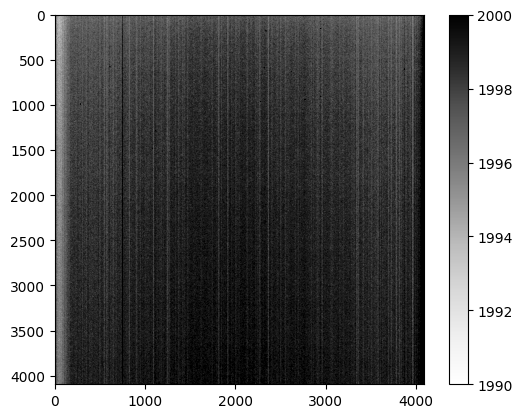

In [7]:
plt.imshow(image_data, cmap='Greys',vmin=1990, vmax=2000)
plt.colorbar();

In [3]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 2176
Max: 51232
Mean: 2281.648383284723
Stdev: 64.542944876112


In [4]:
from ccdproc import ImageFileCollection,combine
im_collection = ImageFileCollection('/home/jovyan/test_darks/')


In [6]:
im_collection.summary['file','imgtype']

KeyError: 'imgtype'

In [53]:
histogram = plt.hist(image_data.flatten(), bins='auto')

Error in callback <function flush_figures at 0xffff535679d0> (for post_execute):


KeyboardInterrupt: 